# M

**Network Security Course Project**

**Student Name:** Mohammad Hamim  
**Student ID:** 202280090114

---

## Project Overview

Malicious URLs are a primary attack vector in cybersecurity, enabling phishing attacks, malware distribution, website defacement, and credential theft. This project develops a machine learning-based system to classify URLs into four categories:

- **Benign** — Safe URLs
- **Defacement** — Compromised websites
- **Phishing** — Fraudulent links designed to steal information
- **Malware** — URLs hosting malicious software

The classifier can enhance cybersecurity systems including email filters, network firewalls, and browser protection mechanisms.

---

## Dataset Information

**Source:** Malicious URLs Dataset (Kaggle)  
**Total Records:** 651,191 URLs  
**Data Sources:** ISCX URL 2016, PhishTank, PhishStorm, Malware Domain List

**Features:**
- `url` — Website link
- `type` — Class label (benign, defacement, phishing, malware)

**Class Distribution:**
- Benign: 66%
- Defacement: 15%
- Phishing: 14%
- Malware: 5%

---

## Feature Engineering

The following features are extracted from raw URLs:

**Lexical Features:**
- URL length and hostname length
- Letter and digit counts
- Special character counts (@, ?, -, =, ., #, %, +, $, !, *, ,, //)

**Structural Features:**
- IP address presence
- HTTPS protocol detection
- Number of directories
- Embedded domains count
- First directory length
- Top-level domain (TLD) length

**Behavioral Features:**
- URL shortening service detection
- Suspicious keyword detection (login, bank, paypal, etc.)
- Abnormal URL patterns

---

## Machine Learning Models

The following models are trained and evaluated:

**Traditional ML Models:**
- Decision Tree
- Random Forest
- Extra Trees Classifier
- AdaBoost
- Gaussian Naive Bayes
- SGD Classifier

**Gradient Boosting Models:**
- Gradient Boosting Classifier
- XGBoost

---

## Evaluation Metrics

Due to class imbalance, multiple metrics are used:
- Accuracy
- Precision (macro average)
- Recall (macro average)
- F1-Score (macro average)
- Confusion Matrix
- Classification Report

---

## Project Workflow

1. Dataset Loading and Preprocessing
2. Exploratory Data Analysis
3. Feature Engineering
4. Model Training and Evaluation
5. Hyperparameter Tuning
6. Model Selection and Deployment
7. Data Visualization and Analysis

# 1. Dataset Loading and Preprocessing

In [1]:
!pip install tld


In [8]:
# Install dependencies as needed:
# pip install kagglehub pandas

import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sid321axn/malicious-urls-dataset")

print(f"Dataset downloaded to: {path}")

# Load the CSV file with proper error handling
import os
csv_file = os.path.join(path, "malicious_phish.csv")

df = pd.read_csv(
    csv_file,
    encoding='utf-8',
    on_bad_lines='skip'
)

print(f"\n✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape}")
print(f"\nFirst 5 records:\n")
print(df.head())

100%|██████████| 16.9M/16.9M [00:03<00:00, 5.57MB/s]

Extracting files...


Dataset downloaded to: C:\Users\hamim\.cache\kagglehub\datasets\sid321axn\malicious-urls-dataset\versions\1

✅ Dataset loaded successfully!
📊 Shape: (651191, 2)

First 5 records:

                                                 url        type
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement

✅ Dataset loaded successfully!
📊 Shape: (651191, 2)

First 5 records:

                                                 url        type
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net

In [9]:
# Load dataset
# df = pd.read_csv('/kaggle/input/malicious-urls-dataset/malicious_phish.csv') # Removed redundant loading

print("\n✅ Dataset successfully loaded!")
print(f"📊 Shape: {df.shape}")

# Preview first rows
df.head()


✅ Dataset successfully loaded!
📊 Shape: (651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [10]:
# ============================================================
# Basic Dataset Information
# ============================================================

print("📘 Dataset Info:")
df.info()

print("\n🔢 Number of Missing Values:")
print(df.isnull().sum())

📘 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB

🔢 Number of Missing Values:
url     0
type    0
dtype: int64



📊 Class Distribution:
type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64


C:\Users\hamim\AppData\Local\Temp\ipykernel_20660\97414052.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


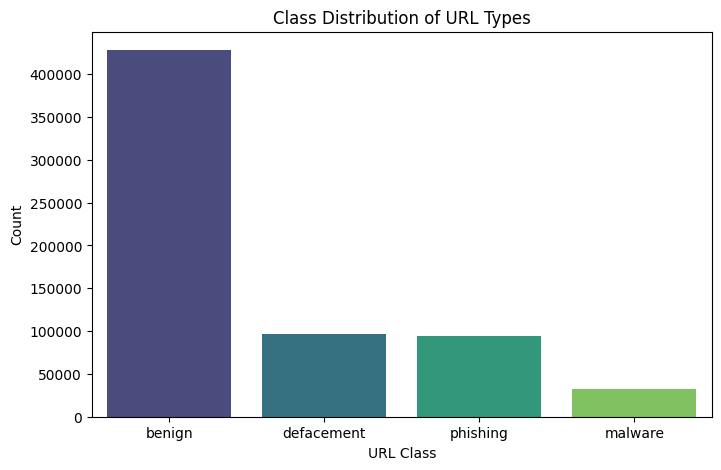

In [11]:
# ============================================================
# Class Distribution
# ============================================================

class_counts = df['type'].value_counts()

print("\n📊 Class Distribution:")
print(class_counts)

# Plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution of URL Types")
plt.xlabel("URL Class")
plt.ylabel("Count")
plt.show()



📏 URL Length Statistics:
count    651191.000000
mean         60.156831
std          44.753902
min           1.000000
25%          32.000000
50%          47.000000
75%          77.000000
max        2175.000000
Name: url_length, dtype: float64


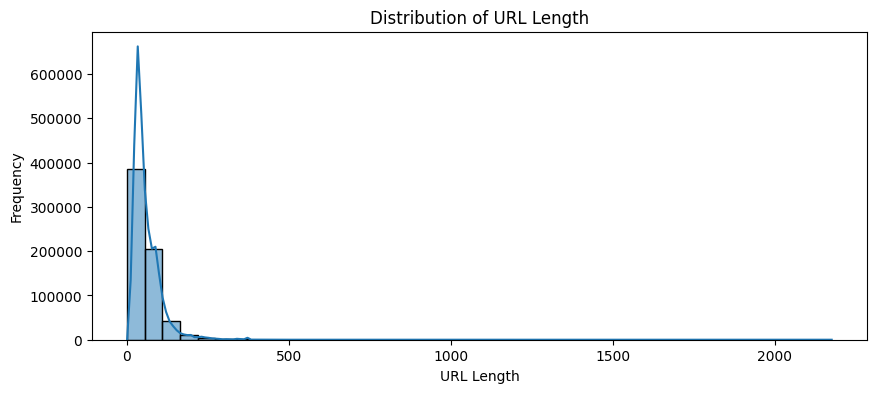

In [12]:
# ============================================================
# Basic URL Length Statistics
# ============================================================

df['url_length'] = df['url'].apply(lambda x: len(str(x)))

print("\n📏 URL Length Statistics:")
print(df['url_length'].describe())

plt.figure(figsize=(10,4))
sns.histplot(df['url_length'], bins=40, kde=True)
plt.title("Distribution of URL Length")
plt.xlabel("URL Length")
plt.ylabel("Frequency")
plt.show()


In [13]:
# ============================================================
# Preview Samples from Each Class
# ============================================================

for label in df['type'].unique():
    print(f"\n🔹 Example {label} URLs:")
    display(df[df['type'] == label].head(3))



🔹 Example phishing URLs:


,url,type,url_length
0,br-icloud.com.br,phishing,16
21,signin.eby.de.zukruygxctzmmqi.civpro.co.za,phishing,42
28,http://www.marketingbyinternet.com/mo/e56508df...,phishing,71



🔹 Example benign URLs:


,url,type,url_length
1,mp3raid.com/music/krizz_kaliko.html,benign,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,31
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,118



🔹 Example defacement URLs:


,url,type,url_length
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235
8,http://www.pashminaonline.com/pure-pashminas,defacement,44



🔹 Example malware URLs:


,url,type,url_length
38,http://www.824555.com/app/member/SportOption.p...,malware,67
115,http://9779.info/%E5%84%BF%E7%AB%A5%E7%AB%8B%E...,malware,81
156,http://9779.info/%E6%A0%91%E5%8F%B6%E7%B2%98%E...,malware,63


# 2. Feature Engineering

In [26]:
# Import required modules
import re
from urllib.parse import urlparse
from tld import get_tld

# -----------------------------
# IP Address Checker
# -----------------------------
def having_ip_address(url):
    ipv4_pattern = (
        r"(([01]?\d\d?|2[0-4]\d|25[0-5])\.){3}"
        r"([01]?\d\d?|2[0-4]\d|25[0-5])"
    )
    ipv6_pattern = r"([a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}"

    if re.search(ipv4_pattern, url) or re.search(ipv6_pattern, url):
        return 1
    return 0

In [27]:
# -----------------------------
# Abnormal URL
# -----------------------------
def abnormal_url(url):
    hostname = str(urlparse(url).hostname)
    return 0 if hostname and hostname in url else 1

In [28]:
import re

def shortening_service(url):
    """
    Detect if url uses a known URL-shortener domain.
    Returns 1 if yes, 0 otherwise.
    """
    # exhaustive list (case-insensitive)
    pattern = (
        r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
        r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
        r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
        r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|lnkd\.in|'
        r'db\.tt|qr\.ae|adf\.ly|bitly\.com|cur\.lv|tinyurl\.com|ity\.im|'
        r'q\.gs|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
        r'prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
        r'tr\.im|link\.zip\.net'
    )
    return 1 if re.search(pattern, url, re.IGNORECASE) else 0

In [29]:
# -----------------------------
# Count Letters
# -----------------------------
def letter_count(url):
    return sum(c.isalpha() for c in url)

In [30]:
# -----------------------------
# Count Digits
# -----------------------------
def digit_count(url):
    return sum(c.isnumeric() for c in url)

In [31]:
# -----------------------------
# HTTPS Detection
# -----------------------------
def http_secure(url):
    return 1 if urlparse(url).scheme == 'https' else 0

In [32]:
# -----------------------------
# Suspicious Keyword Detection
# -----------------------------
def suspicious_words(url):
    pattern = (
        r"PayPal|login|signin|bank|account|update|free|bonus|service|"
        r"ebayisapi|webscr|lucky|secure|verification|confirm"
    )
    return 1 if re.search(pattern, url, re.IGNORECASE) else 0

In [33]:
# -----------------------------
# Number of Directories
# -----------------------------
def count_directories(url):
    return urlparse(url).path.count('/')

In [34]:
# -----------------------------
# Number of Embedded Domains
# -----------------------------
def count_embedded_domains(url):
    urldir = urlparse(url).path
    return urldir.count('//')

In [35]:
# -----------------------------
# First Directory Length
# -----------------------------
def first_dir_length(url):
    try:
        return len(urlparse(url).path.split('/')[1])
    except:
        return 0

In [36]:
# -----------------------------
# Top-Level Domain Length
# -----------------------------
def tld_length(url):
    try:
        tld = get_tld(url, fail_silently=True)
        return len(tld) if tld else 0
    except:
        return 0

In [37]:
# Basic lexical features
df["url_length"] = df["url"].apply(len)
df["hostname_length"] = df["url"].apply(lambda x: len(urlparse(x).netloc))

df["count_letters"] = df["url"].apply(letter_count)
df["count_digits"] = df["url"].apply(digit_count)

# Special characters
special_chars = ['@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*', ',', '//']
for ch in special_chars:
    df[f"count_{ch.replace('//','slashes')}"] = df["url"].apply(lambda x: x.count(ch))

df["count_www"] = df["url"].apply(lambda x: x.count("www"))

# Domain-based features
df["has_ip"] = df["url"].apply(having_ip_address)
df["abnormal_url"] = df["url"].apply(abnormal_url)
df["short_url"] = df["url"].apply(shortening_service)
df["https"] = df["url"].apply(http_secure)

df["count_dir"] = df["url"].apply(count_directories)
df["count_embed_domain"] = df["url"].apply(count_embedded_domains)
df["fd_length"] = df["url"].apply(first_dir_length)

# TLD
df["tld_length"] = df["url"].apply(tld_length)

# Suspicious keywords
df["suspicious"] = df["url"].apply(suspicious_words)


In [38]:
df.head()

,url,type,url_length,hostname_length,count_letters,count_digits,count_@,count_?,count_-,count_=,...,count_www,has_ip,abnormal_url,short_url,https,count_dir,count_embed_domain,fd_length,tld_length,suspicious
0,br-icloud.com.br,phishing,16,0,13,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,29,1,0,0,0,0,...,0,0,1,0,0,2,0,5,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,25,1,0,0,0,0,...,0,0,1,0,0,3,0,7,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,21,63,7,0,1,1,4,...,1,0,0,0,0,1,0,9,2,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,23,199,22,0,1,1,3,...,0,0,0,0,0,1,0,9,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   url                 651191 non-null  object
 1   type                651191 non-null  object
 2   url_length          651191 non-null  int64 
 3   hostname_length     651191 non-null  int64 
 4   count_letters       651191 non-null  int64 
 5   count_digits        651191 non-null  int64 
 6   count_@             651191 non-null  int64 
 7   count_?             651191 non-null  int64 
 8   count_-             651191 non-null  int64 
 9   count_=             651191 non-null  int64 
 10  count_.             651191 non-null  int64 
 11  count_#             651191 non-null  int64 
 12  count_%             651191 non-null  int64 
 13  count_+             651191 non-null  int64 
 14  count_$             651191 non-null  int64 
 15  count_!             651191 non-null  int64 
 16  co

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["label"] = le.fit_transform(df["type"])

In [40]:
import pickle
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

In [41]:
label_map = {i: cls for i, cls in enumerate(le.classes_)}
print(label_map)

{0: 'benign', 1: 'defacement', 2: 'malware', 3: 'phishing'}


In [42]:
exclude_cols = ["url", "type"]
feature_cols = [col for col in df.columns if col not in exclude_cols + ["label"]]

X = df[feature_cols]
y = df["label"]

X.shape, y.shape

((651191, 27), (651191,))

In [43]:
df.head()

,url,type,url_length,hostname_length,count_letters,count_digits,count_@,count_?,count_-,count_=,...,has_ip,abnormal_url,short_url,https,count_dir,count_embed_domain,fd_length,tld_length,suspicious,label
0,br-icloud.com.br,phishing,16,0,13,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,3
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,29,1,0,0,0,0,...,0,1,0,0,2,0,5,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,25,1,0,0,0,0,...,0,1,0,0,3,0,7,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,21,63,7,0,1,1,4,...,0,0,0,0,1,0,9,2,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,23,199,22,0,1,1,3,...,0,0,0,0,1,0,9,3,0,1


# 3. Model Training and Evaluation

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((520952, 27), (130239, 27))

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

def evaluate_model(name, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, average='macro'),
        "Recall": recall_score(y_test, preds, average='macro'),
        "F1 Score": f1_score(y_test, preds, average='macro')
    }

In [49]:
print("Evaluating Decision Tree...")

dt_result = evaluate_model(
    "Decision Tree",
    DecisionTreeClassifier(
        max_depth=15,
        min_samples_split=10
    )
)

dt_result


Evaluating Decision Tree...


{'Model': 'Decision Tree',
 'Accuracy': 0.9587450763596158,
 'Precision': 0.9498751213023173,
 'Recall': 0.9226834480607261,
 'F1 Score': 0.9352767023827664}

In [50]:
print("Evaluating Random Forest...")

rf_result = evaluate_model(
    "Random Forest",
    RandomForestClassifier(
        n_estimators=120,
        max_depth=18,
        n_jobs=-1
    )
)

rf_result


Evaluating Random Forest...


{'Model': 'Random Forest',
 'Accuracy': 0.9640199940110106,
 'Precision': 0.9642091894495275,
 'Recall': 0.9312205202596255,
 'F1 Score': 0.9464477971383913}

In [51]:
print("Evaluating Extra Trees...")

et_result = evaluate_model(
    "Extra Trees",
    ExtraTreesClassifier(
        n_estimators=150,
        max_depth=20,
        n_jobs=-1
    )
)

et_result


Evaluating Extra Trees...


{'Model': 'Extra Trees',
 'Accuracy': 0.9387280307741921,
 'Precision': 0.9355655621125185,
 'Recall': 0.8684639238485519,
 'F1 Score': 0.8952548073638715}

In [52]:
print("Evaluating AdaBoost...")

ada_result = evaluate_model(
    "AdaBoost",
    AdaBoostClassifier(
        n_estimators=80,
        learning_rate=0.8
    )
)

ada_result


Evaluating AdaBoost...


c:\Users\hamim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'Model': 'AdaBoost',
 'Accuracy': 0.592710324864288,
 'Precision': 0.738910309613056,
 'Recall': 0.702915624099794,
 'F1 Score': 0.6457606620353684}

In [53]:
print("Evaluating Gaussian NB...")

nb_result = evaluate_model(
    "Gaussian NB",
    GaussianNB()
)

nb_result


Evaluating Gaussian NB...


{'Model': 'Gaussian NB',
 'Accuracy': 0.8230560738334908,
 'Precision': 0.7344930183829883,
 'Recall': 0.7389443520798025,
 'F1 Score': 0.7126781592530067}

In [54]:
print("Evaluating SGD Classifier...")

sgd_result = evaluate_model(
    "SGD Classifier",
    SGDClassifier(
        max_iter=1200,
        loss='log_loss',   # fixed warning
        penalty='l2'
    )
)

sgd_result


Evaluating SGD Classifier...


{'Model': 'SGD Classifier',
 'Accuracy': 0.8591742872718617,
 'Precision': 0.7951965807611554,
 'Recall': 0.7405205120317434,
 'F1 Score': 0.7378092141222616}

In [55]:
print("Evaluating Gradient Boosting...")

gb_result = evaluate_model(
    "Gradient Boosting",
    GradientBoostingClassifier(
        n_estimators=120,
        learning_rate=0.1,
        max_depth=3
    )
)

gb_result


Evaluating Gradient Boosting...


{'Model': 'Gradient Boosting',
 'Accuracy': 0.944908975038199,
 'Precision': 0.9287400071510472,
 'Recall': 0.8866965900997986,
 'F1 Score': 0.9055260974206341}

In [56]:
print("Evaluating XGBoost...")

xgb_result = evaluate_model(
    "XGBoost",
    XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='mlogloss',
        tree_method='hist',  # super fast
        n_jobs=-1
    )
)

xgb_result


Evaluating XGBoost...


{'Model': 'XGBoost',
 'Accuracy': 0.9605801641597371,
 'Precision': 0.9554536605604352,
 'Recall': 0.9256488577492212,
 'F1 Score': 0.9395285872517087}

In [57]:
results = [
    dt_result,
    rf_result,
    et_result,
    ada_result,
    nb_result,
    sgd_result,
    gb_result,
    xgb_result,
]

results_df = pd.DataFrame(results)
results_df=results_df.sort_values("Accuracy", ascending=False)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
1,Random Forest,0.964020,0.964209,0.931221,0.946448
7,XGBoost,0.960580,0.955454,0.925649,0.939529
0,Decision Tree,0.958745,0.949875,0.922683,0.935277
6,Gradient Boosting,0.944909,0.928740,0.886697,0.905526
2,Extra Trees,0.938728,0.935566,0.868464,0.895255
5,SGD Classifier,0.859174,0.795197,0.740521,0.737809
4,Gaussian NB,0.823056,0.734493,0.738944,0.712678
3,AdaBoost,0.592710,0.738910,0.702916,0.645761


# 4. Hyperparameter Tuning

In [58]:
# Take only 80,000 samples for tuning (adjustable)
X_tune, _, y_tune, _ = train_test_split(
    X_train, y_train,
    train_size=80000,
    stratify=y_train,
    random_state=42
)

print("Tuning dataset shape:", X_tune.shape)

Tuning dataset shape: (80000, 27)


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    "n_estimators": [80, 120, 160],
    "max_depth": [12, 16, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf_model = RandomForestClassifier(
    n_jobs=-1,
    random_state=42
)

rf_grid = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    scoring="f1_macro",
    cv=2,
    verbose=1,
    n_jobs=-1
)

rf_grid.fit(X_tune, y_tune)

print("Best RF Params:", rf_grid.best_params_)
print("Best RF F1-macro:", rf_grid.best_score_)


Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best RF Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 160}
Best RF F1-macro: 0.9325628799474868
Best RF Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 160}
Best RF F1-macro: 0.9325628799474868


In [60]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_param_grid = {
    "n_estimators": [150, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [5, 6],
    "subsample": [0.8],
    "colsample_bytree": [0.8],
}

xgb_model = XGBClassifier(
    objective="multi:softprob",
    eval_metric="mlogloss",
    tree_method="hist",
    n_jobs=-1,
    random_state=42
)

xgb_grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    scoring="f1_macro",
    cv=2,
    verbose=1,
    n_jobs=-1
)

xgb_grid.fit(X_tune, y_tune)

print("Best XGB Params:", xgb_grid.best_params_)
print("Best XGB F1-macro:", xgb_grid.best_score_)


Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best XGB Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Best XGB F1-macro: 0.9296779502172707
Best XGB Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Best XGB F1-macro: 0.9296779502172707


# 5. Final Model Selection and Evaluation

In [61]:
from sklearn.metrics import f1_score

rf_best = rf_grid.best_estimator_
rf_best.fit(X_train, y_train)

rf_pred = rf_best.predict(X_test)
print("Random-Forest best-params score (CV): {:.4f}".format(rf_grid.best_score_))
print("Random-Forest F1-macro on TEST:       {:.4f}".format(f1_score(y_test, rf_pred, average='macro')))

xgb_best = xgb_grid.best_estimator_
xgb_best.fit(X_train, y_train)

xgb_pred = xgb_best.predict(X_test)
print("XGBoost best-params score (CV): {:.4f}".format(xgb_grid.best_score_))
print("XGBoost F1-macro on TEST:       {:.4f}".format(f1_score(y_test, xgb_pred, average='macro')))

Random-Forest best-params score (CV): 0.9326
Random-Forest F1-macro on TEST:       0.9506
XGBoost best-params score (CV): 0.9297
XGBoost F1-macro on TEST:       0.9396
XGBoost best-params score (CV): 0.9297
XGBoost F1-macro on TEST:       0.9396


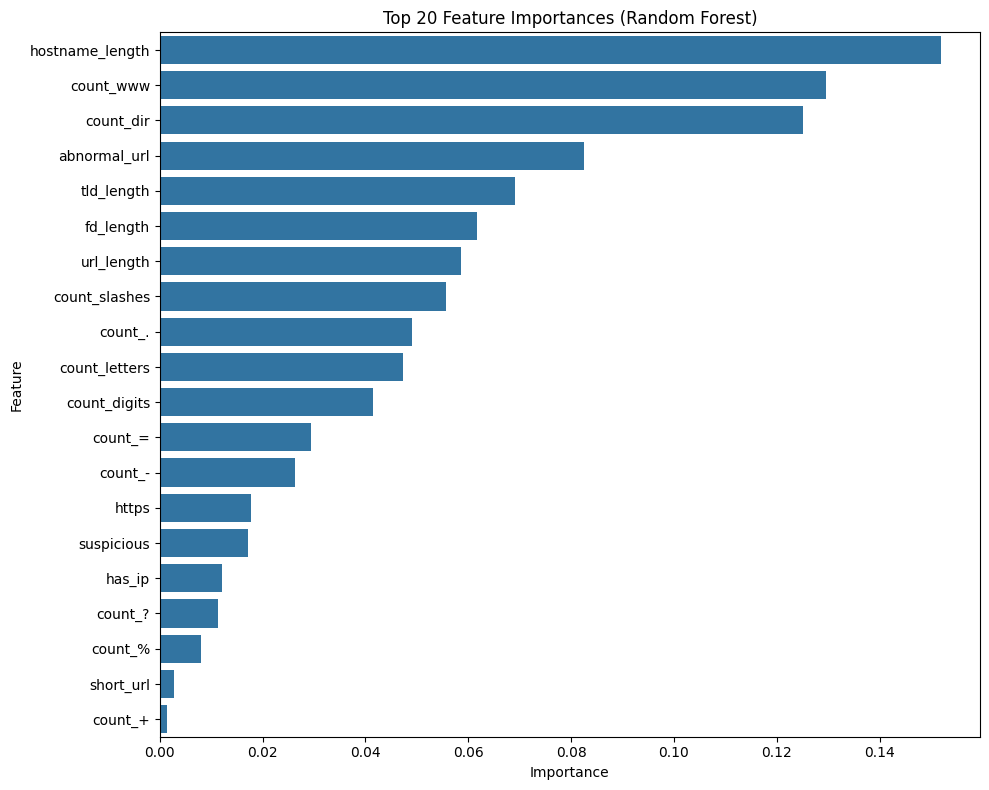

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
importances = rf_best.feature_importances_
feat_names = X_train.columns

# Sort by importance
indices = importances.argsort()[::-1]
top_n = 20

plt.figure(figsize=(10, 8))
sns.barplot(
    x=importances[indices][:top_n],
    y=feat_names[indices][:top_n]
)
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


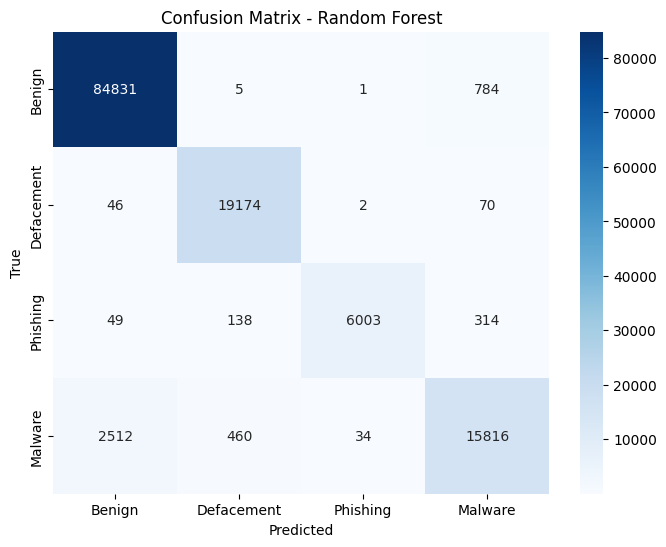

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_pred)
labels = ["Benign", "Defacement", "Phishing", "Malware"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [64]:
from sklearn.metrics import classification_report

print("Classification Report (Random Forest):\n")
print(classification_report(y_test, rf_pred))


Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85621
           1       0.97      0.99      0.98     19292
           2       0.99      0.92      0.96      6504
           3       0.93      0.84      0.88     18822

    accuracy                           0.97    130239
   macro avg       0.97      0.94      0.95    130239
weighted avg       0.97      0.97      0.97    130239



C:\Users\hamim\AppData\Local\Temp\ipykernel_20660\3165659300.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x="F1-Macro", y="Model", palette="viridis")


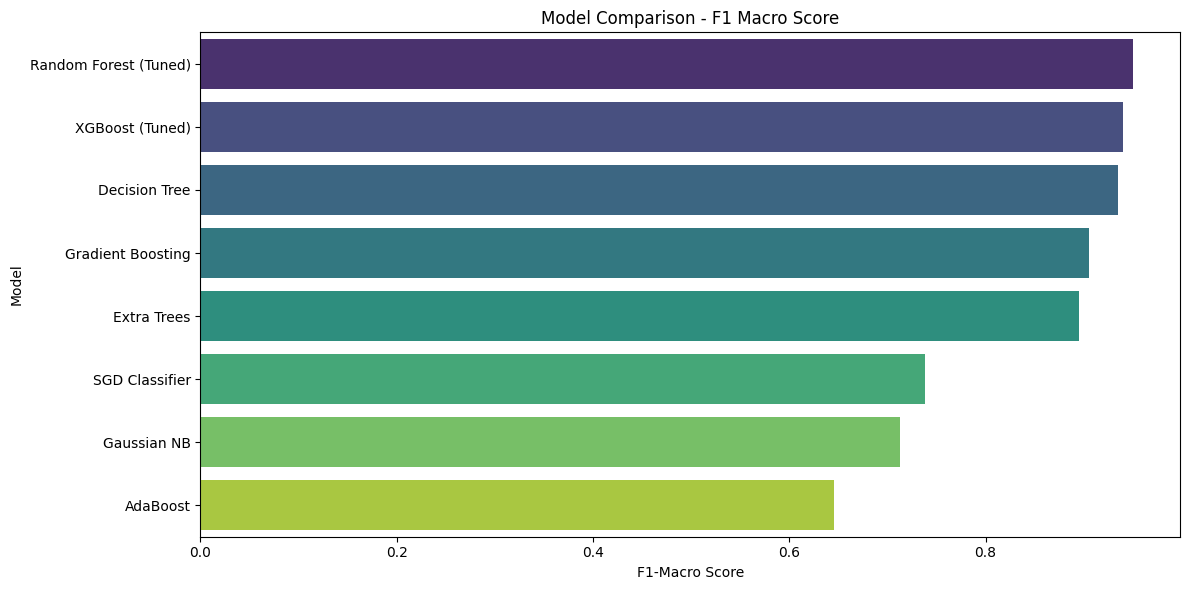

,Model,F1-Macro
1,Random Forest (Tuned),0.950614
2,XGBoost (Tuned),0.939622
0,Decision Tree,0.935277
7,Gradient Boosting,0.905526
3,Extra Trees,0.895255
6,SGD Classifier,0.737809
5,Gaussian NB,0.712678
4,AdaBoost,0.645761


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

comparison_df = pd.DataFrame({
    "Model": [
        "Decision Tree", "Random Forest (Tuned)", "XGBoost (Tuned)",
        "Extra Trees", "AdaBoost", "Gaussian NB",
        "SGD Classifier", "Gradient Boosting"
    ],
    "F1-Macro": [
        dt_result["F1 Score"],
        rf_best_f1 := f1_score(y_test, rf_pred, average='macro'),
        xgb_best_f1 := f1_score(y_test, xgb_pred, average='macro'),
        et_result["F1 Score"],
        ada_result["F1 Score"],
        nb_result["F1 Score"],
        sgd_result["F1 Score"],
        gb_result["F1 Score"],
    ]
})

comparison_df = comparison_df.sort_values("F1-Macro", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x="F1-Macro", y="Model", palette="viridis")
plt.title("Model Comparison - F1 Macro Score")
plt.xlabel("F1-Macro Score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

comparison_df


In [66]:
import pickle

with open("final_random_forest_model.pkl", "wb") as f:
    pickle.dump(rf_best, f)

print("Random Forest model saved as 'final_random_forest_model.pkl'")


Random Forest model saved as 'final_random_forest_model.pkl'


In [67]:
# Load the saved Random Forest model
with open("final_random_forest_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

print("Model loaded successfully!")


Model loaded successfully!


In [68]:
special_chars = ['@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*', ',', '//']

def extract_url_features(url):
    data = {}

    # Basic lexical
    data["url_length"] = len(url)
    data["hostname_length"] = len(urlparse(url).netloc)
    data["count_letters"] = letter_count(url)
    data["count_digits"] = digit_count(url)

    # Special characters
    for ch in special_chars:
        col_name = f"count_{ch.replace('//','slashes')}"
        data[col_name] = url.count(ch)

    data["count_www"] = url.count("www")

    # Domain-based
    data["has_ip"] = having_ip_address(url)
    data["abnormal_url"] = abnormal_url(url)
    data["short_url"] = shortening_service(url)
    data["https"] = http_secure(url)
    data["count_dir"] = count_directories(url)
    data["count_embed_domain"] = count_embedded_domains(url)
    data["fd_length"] = first_dir_length(url)

    # TLD
    data["tld_length"] = tld_length(url)

    # Suspicious keywords
    data["suspicious"] = suspicious_words(url)

    return pd.DataFrame([data])

In [69]:
test_urls = [
    "br-icloud.com.br",
    "http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15"

]

label_map = {0: "Benign", 1: "Defacement", 2: "Malware", 3: "Phishing" }

for url in test_urls:
    features = extract_url_features(url)
    pred = loaded_model.predict(features)[0]
    print(f"\n🔍 URL: {url}")
    print(f"➡️ Prediction: {label_map[pred]}")



🔍 URL: br-icloud.com.br
➡️ Prediction: Phishing

🔍 URL: http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=70&vsig70_0=15
➡️ Prediction: Defacement


# 6. Comprehensive Data Visualization and Analysis

## 6.1 Class Distribution Analysis

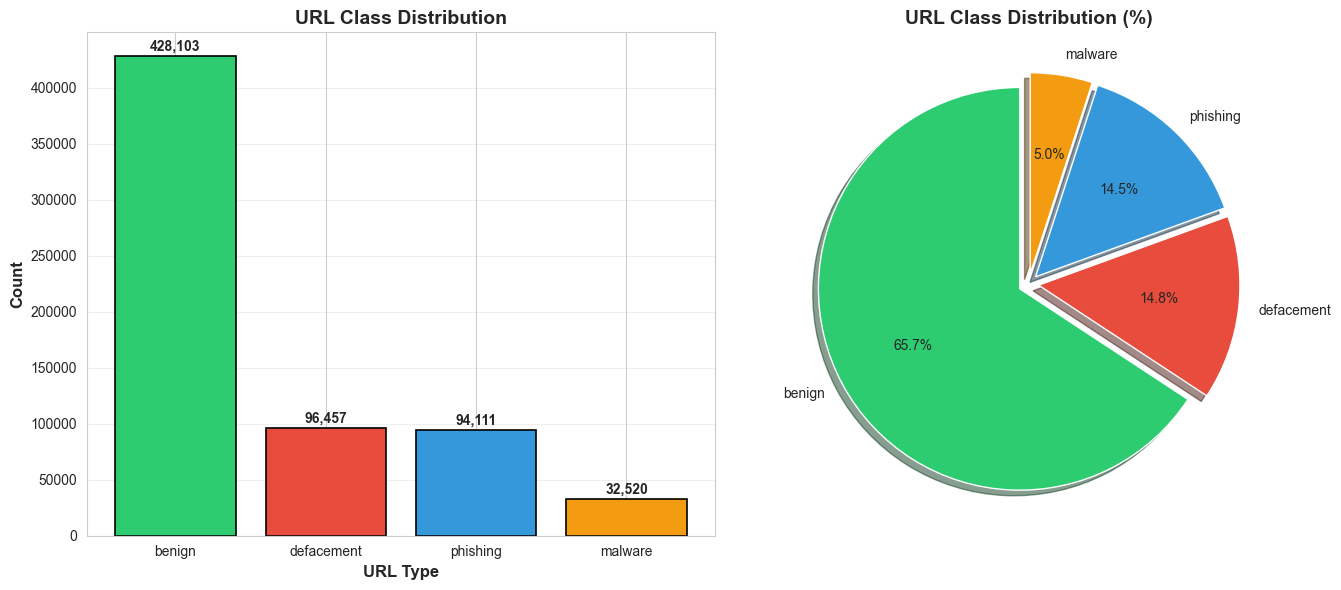


Class Distribution Summary:
benign         : 428,103 (65.74%)
defacement     :  96,457 (14.81%)
phishing       :  94,111 (14.45%)
malware        :  32,520 ( 4.99%)


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Class distribution with percentages
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
class_counts = df['type'].value_counts()
colors = ['#2ecc71', '#e74c3c', '#3498db', '#f39c12']
ax1.bar(class_counts.index, class_counts.values, color=colors, edgecolor='black', linewidth=1.2)
ax1.set_xlabel('URL Type', fontsize=12, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12, fontweight='bold')
ax1.set_title('URL Class Distribution', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add count labels
for i, (label, count) in enumerate(class_counts.items()):
    ax1.text(i, count + 5000, f'{count:,}', ha='center', fontsize=10, fontweight='bold')

# Pie chart
explode = (0.05, 0.05, 0.05, 0.05)
ax2.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', 
        colors=colors, explode=explode, shadow=True, startangle=90)
ax2.set_title('URL Class Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nClass Distribution Summary:")
print("="*50)
for label, count in class_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{label:15s}: {count:>7,} ({percentage:>5.2f}%)")

## 6.2 URL Length Analysis by Class

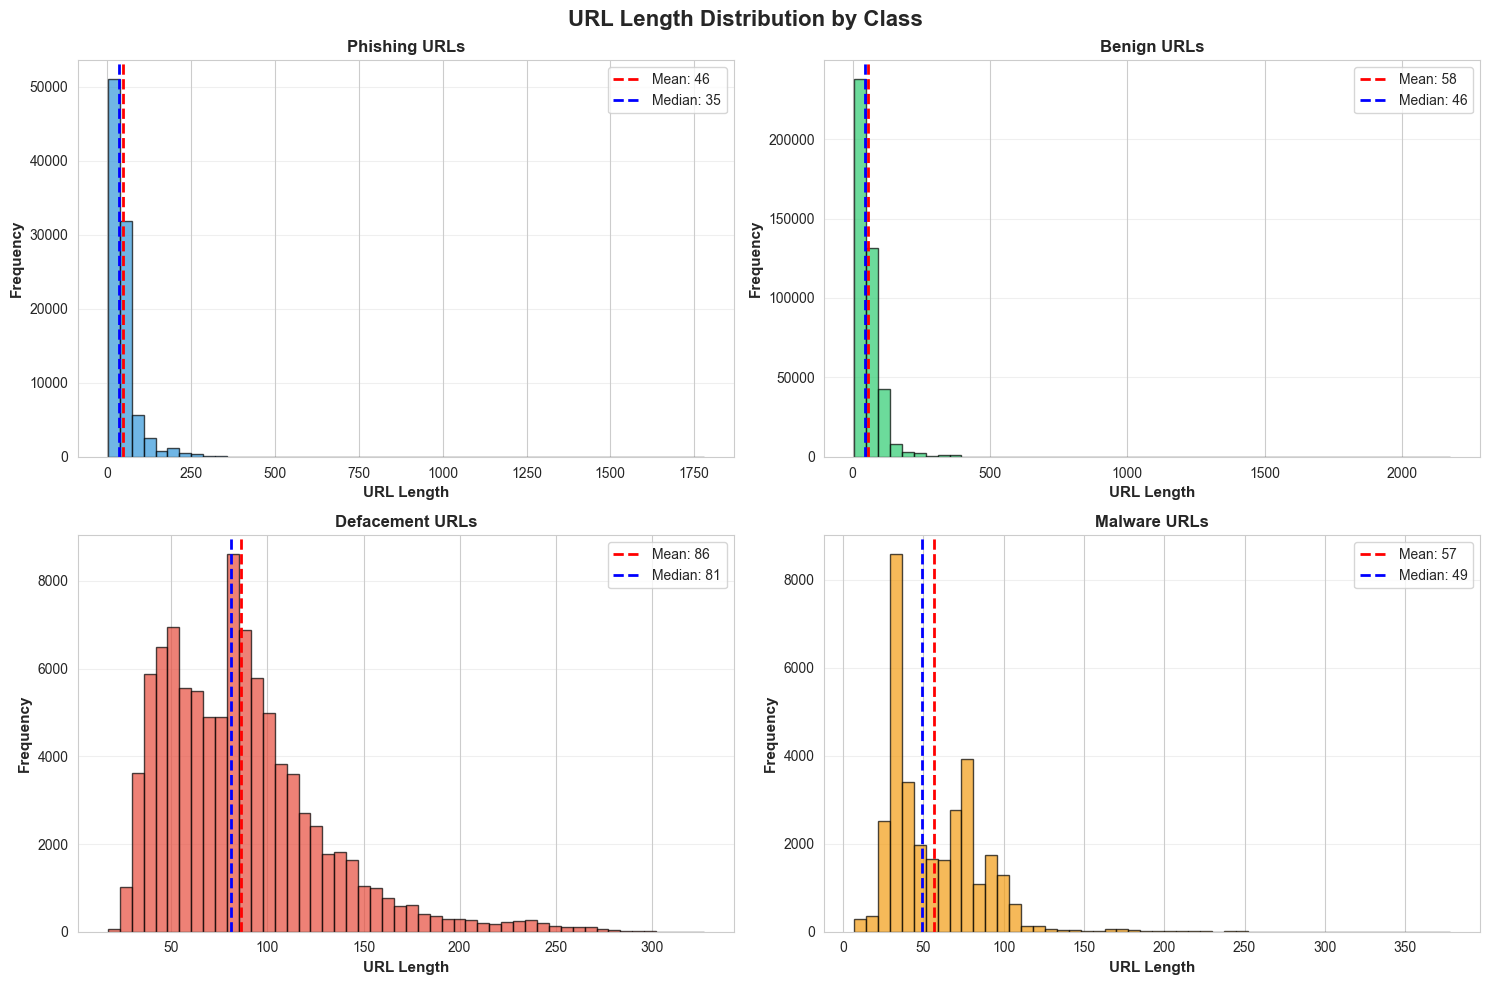


URL Length Statistics by Class:
Class                 Mean     Median        Min        Max        Std
phishing             45.86      35.00          1       1779      43.75
benign               57.68      46.00          6       2175      44.30
defacement           86.34      81.00         17        327      41.89
malware              56.54      49.00          7        378      28.44
malware              56.54      49.00          7        378      28.44


In [71]:
# URL length distribution by class
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('URL Length Distribution by Class', fontsize=16, fontweight='bold')

url_classes = df['type'].unique()
colors_dict = {'benign': '#2ecc71', 'defacement': '#e74c3c', 'phishing': '#3498db', 'malware': '#f39c12'}

for idx, url_type in enumerate(url_classes):
    ax = axes[idx // 2, idx % 2]
    data = df[df['type'] == url_type]['url_length']
    
    ax.hist(data, bins=50, color=colors_dict.get(url_type, 'gray'), 
            edgecolor='black', alpha=0.7)
    ax.set_xlabel('URL Length', fontsize=11, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax.set_title(f'{url_type.capitalize()} URLs', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Add statistics
    mean_len = data.mean()
    median_len = data.median()
    ax.axvline(mean_len, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_len:.0f}')
    ax.axvline(median_len, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_len:.0f}')
    ax.legend()

plt.tight_layout()
plt.show()

# Statistical summary
print("\nURL Length Statistics by Class:")
print("="*70)
print(f"{'Class':<15} {'Mean':>10} {'Median':>10} {'Min':>10} {'Max':>10} {'Std':>10}")
print("="*70)
for url_type in url_classes:
    data = df[df['type'] == url_type]['url_length']
    print(f"{url_type:<15} {data.mean():>10.2f} {data.median():>10.2f} {data.min():>10} {data.max():>10} {data.std():>10.2f}")

## 6.3 Feature Distribution Comparison

C:\Users\hamim\AppData\Local\Temp\ipykernel_20660\1009277528.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=url_classes, patch_artist=True,
C:\Users\hamim\AppData\Local\Temp\ipykernel_20660\1009277528.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=url_classes, patch_artist=True,
C:\Users\hamim\AppData\Local\Temp\ipykernel_20660\1009277528.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=url_classes, patch_artist=True,
C:\Users\hamim\AppData\Local\Temp\ipykernel_20660\1009277528.py:14: Matplotl

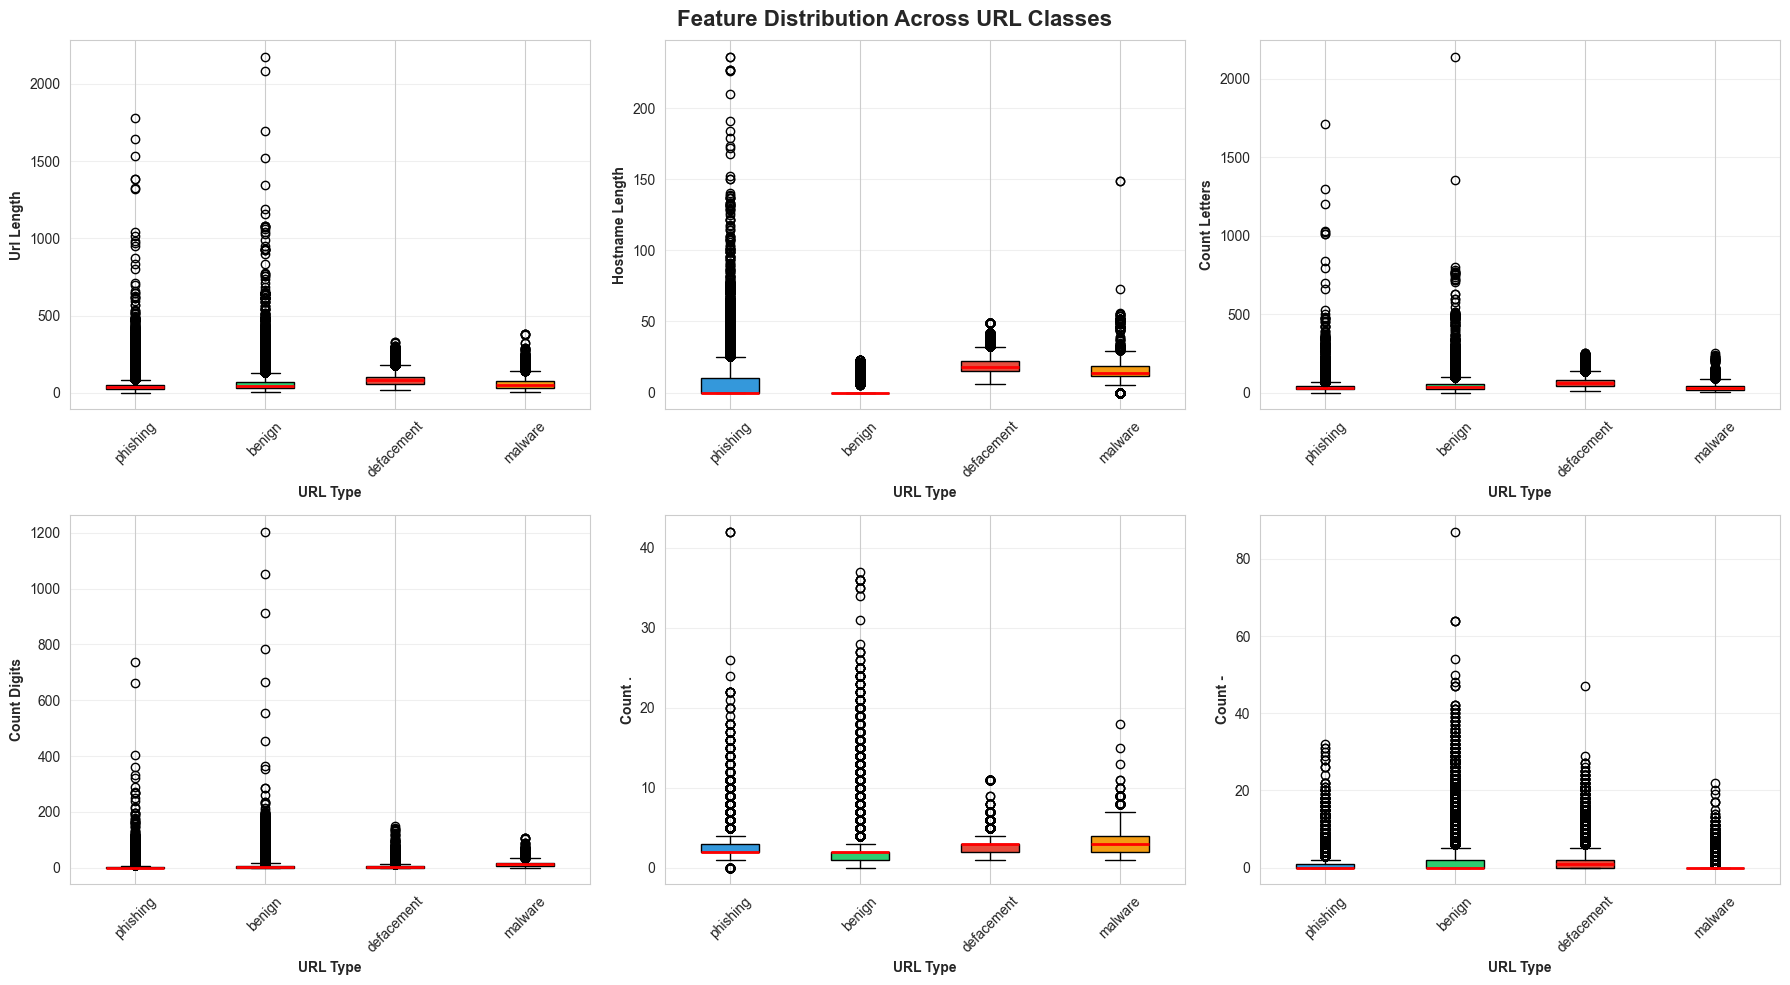

In [73]:
# Box plots for key features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Feature Distribution Across URL Classes', fontsize=16, fontweight='bold')

features_to_plot = ['url_length', 'hostname_length', 'count_letters', 
                    'count_digits', 'count_.', 'count_-']

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx // 3, idx % 3]
    
    # Prepare data
    data_to_plot = [df[df['type'] == url_type][feature] for url_type in url_classes]
    
    bp = ax.boxplot(data_to_plot, labels=url_classes, patch_artist=True,
                    medianprops=dict(color='red', linewidth=2),
                    boxprops=dict(facecolor='lightblue', edgecolor='black'))
    
    # Color boxes
    for patch, url_type in zip(bp['boxes'], url_classes):
        patch.set_facecolor(colors_dict.get(url_type, 'gray'))
    
    ax.set_ylabel(feature.replace('_', ' ').title(), fontsize=10, fontweight='bold')
    ax.set_xlabel('URL Type', fontsize=10, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 6.4 Protocol and Security Features

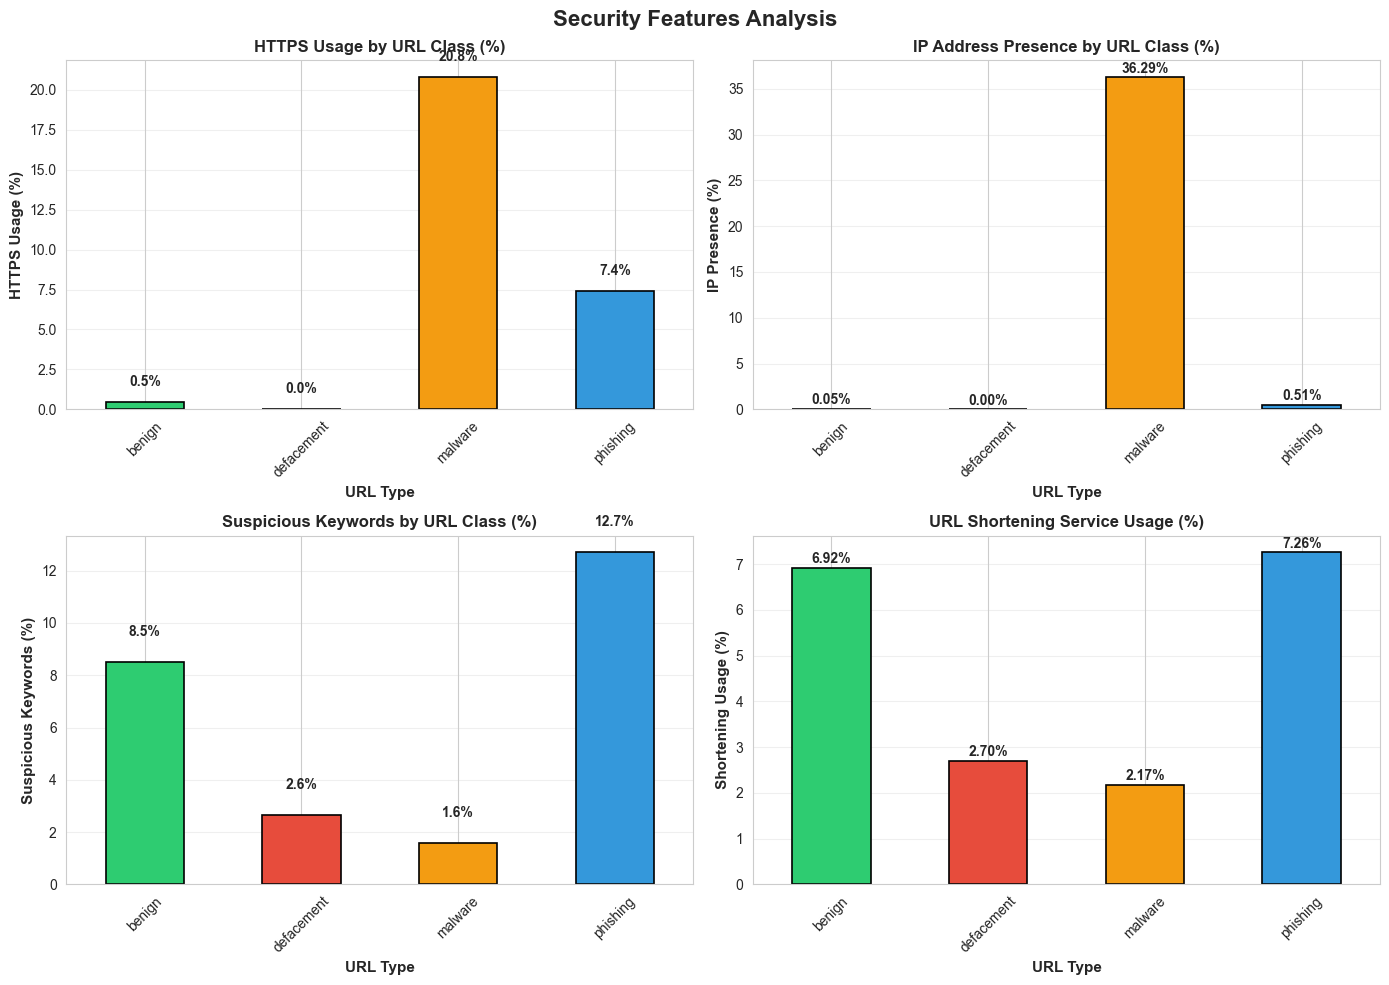

In [74]:
# HTTPS usage and other security features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Security Features Analysis', fontsize=16, fontweight='bold')

# HTTPS usage by class
ax1 = axes[0, 0]
https_by_class = df.groupby('type')['https'].mean() * 100
https_by_class.plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c', '#f39c12', '#3498db'], 
                     edgecolor='black', linewidth=1.2)
ax1.set_title('HTTPS Usage by URL Class (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('HTTPS Usage (%)', fontsize=11, fontweight='bold')
ax1.set_xlabel('URL Type', fontsize=11, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)
for i, v in enumerate(https_by_class.values):
    ax1.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# IP address presence
ax2 = axes[0, 1]
ip_by_class = df.groupby('type')['has_ip'].mean() * 100
ip_by_class.plot(kind='bar', ax=ax2, color=['#2ecc71', '#e74c3c', '#f39c12', '#3498db'],
                 edgecolor='black', linewidth=1.2)
ax2.set_title('IP Address Presence by URL Class (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('IP Presence (%)', fontsize=11, fontweight='bold')
ax2.set_xlabel('URL Type', fontsize=11, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)
for i, v in enumerate(ip_by_class.values):
    ax2.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontweight='bold')

# Suspicious keywords
ax3 = axes[1, 0]
suspicious_by_class = df.groupby('type')['suspicious'].mean() * 100
suspicious_by_class.plot(kind='bar', ax=ax3, color=['#2ecc71', '#e74c3c', '#f39c12', '#3498db'],
                         edgecolor='black', linewidth=1.2)
ax3.set_title('Suspicious Keywords by URL Class (%)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Suspicious Keywords (%)', fontsize=11, fontweight='bold')
ax3.set_xlabel('URL Type', fontsize=11, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)
for i, v in enumerate(suspicious_by_class.values):
    ax3.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# URL shortening service
ax4 = axes[1, 1]
short_by_class = df.groupby('type')['short_url'].mean() * 100
short_by_class.plot(kind='bar', ax=ax4, color=['#2ecc71', '#e74c3c', '#f39c12', '#3498db'],
                    edgecolor='black', linewidth=1.2)
ax4.set_title('URL Shortening Service Usage (%)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Shortening Usage (%)', fontsize=11, fontweight='bold')
ax4.set_xlabel('URL Type', fontsize=11, fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)
for i, v in enumerate(short_by_class.values):
    ax4.text(i, v + 0.1, f'{v:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 6.5 Feature Correlation Heatmap

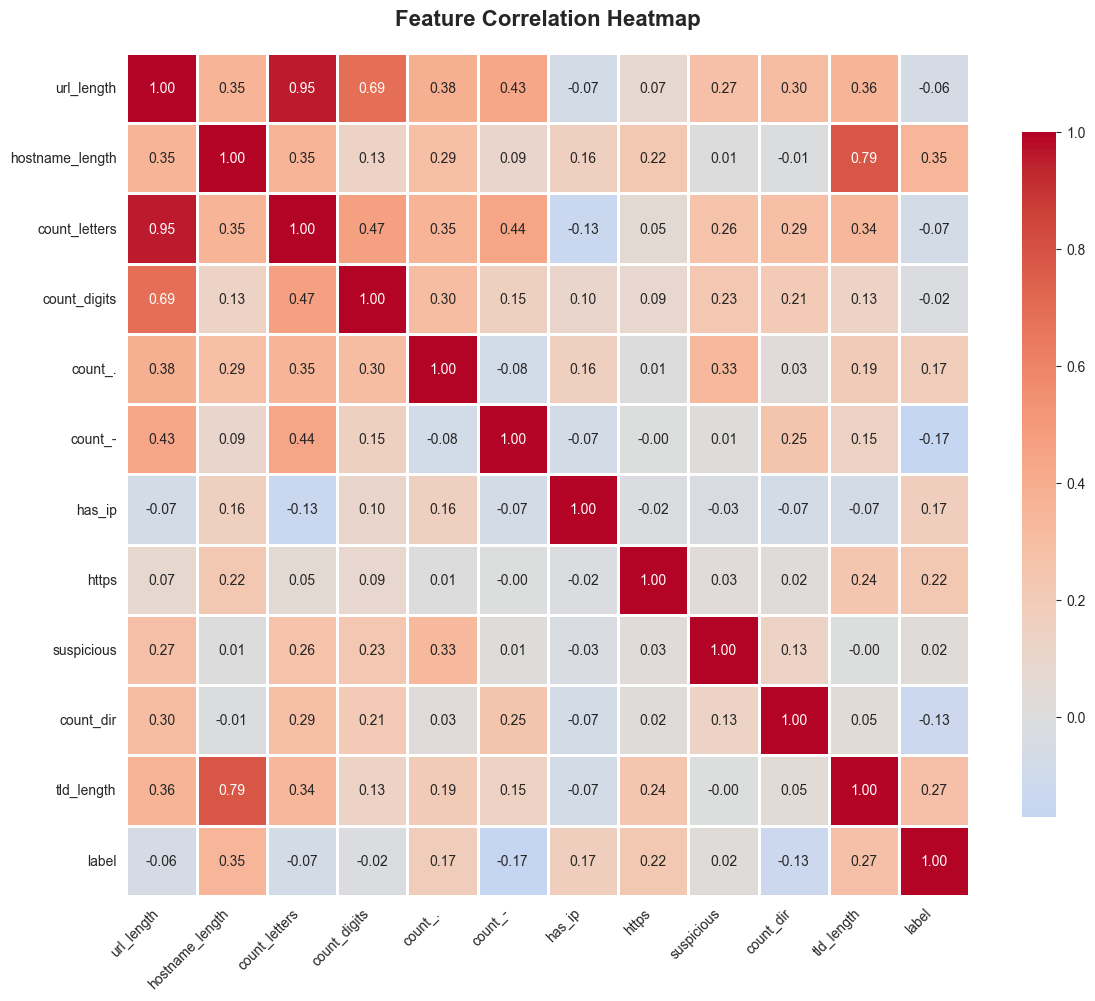

In [76]:
# Correlation heatmap of top features
top_features = ['url_length', 'hostname_length', 'count_letters', 'count_digits',
                'count_.', 'count_-', 'has_ip', 'https', 'suspicious', 
                'count_dir', 'tld_length', 'label']

plt.figure(figsize=(12, 10))
correlation_matrix = df[top_features].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 6.6 Model Performance Comparison

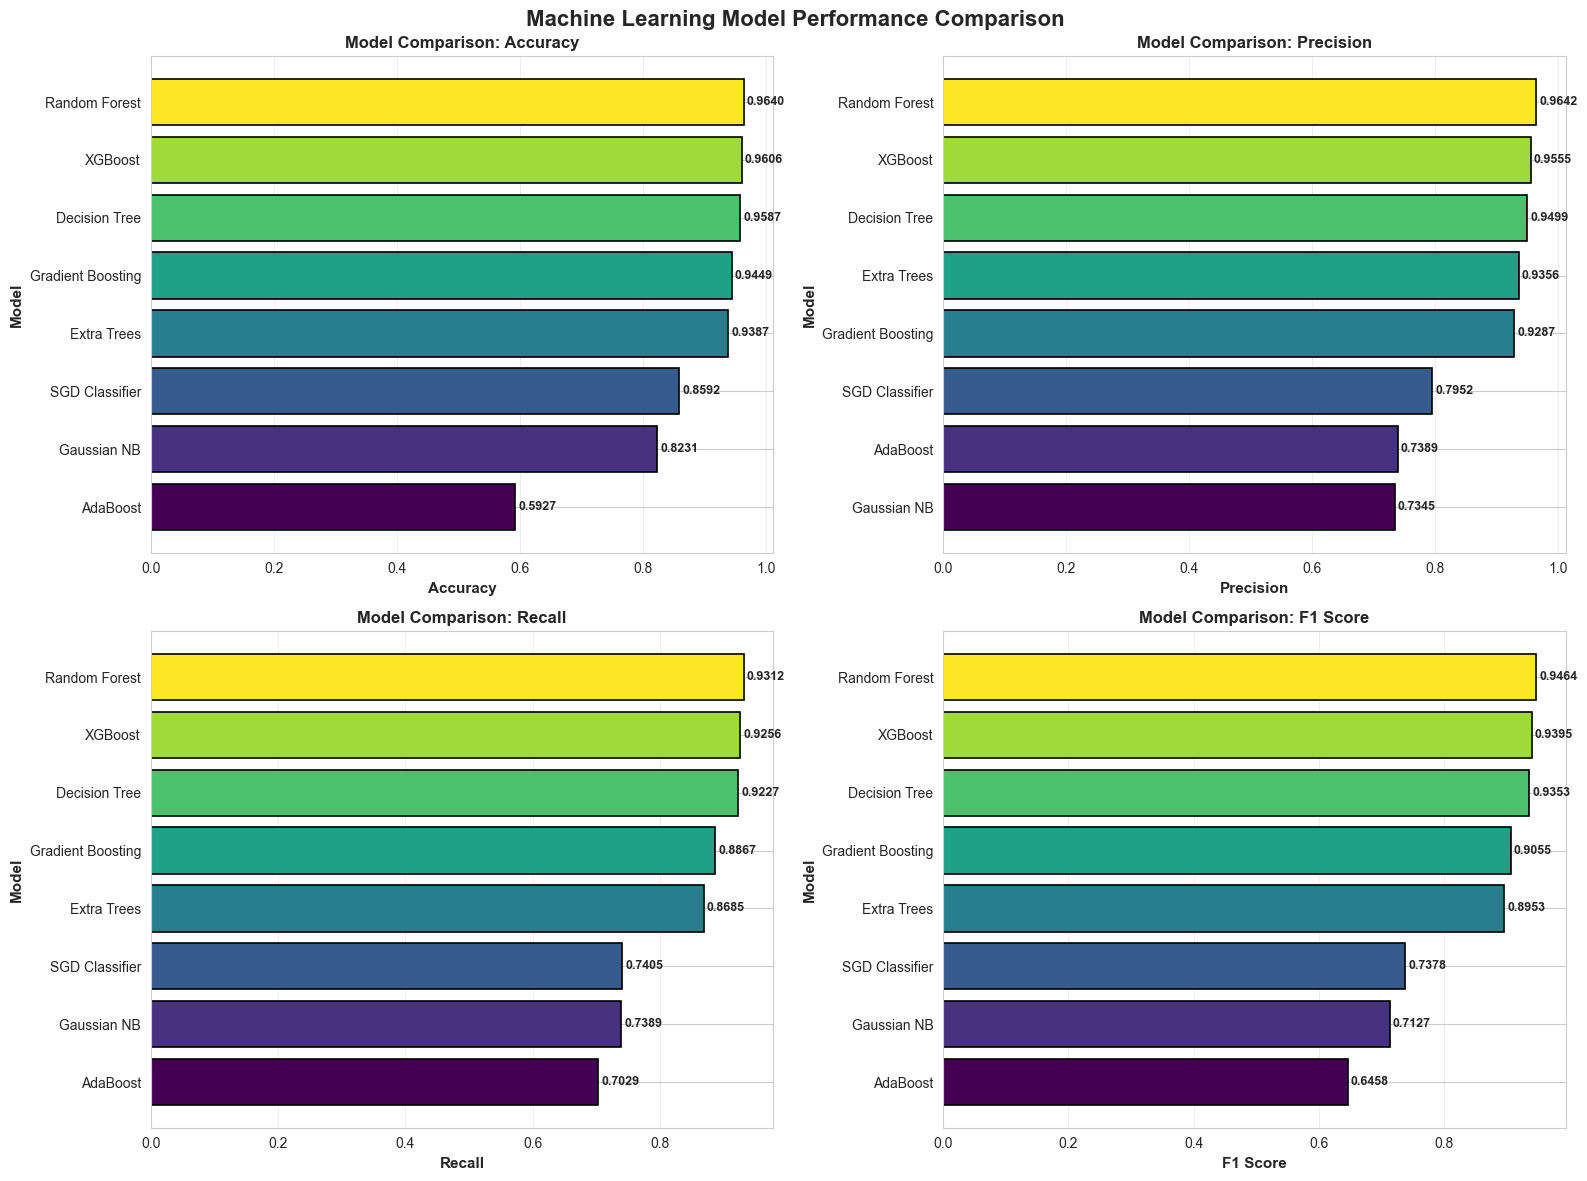


Model Performance Summary:
Model                         Accuracy    Precision       Recall     F1 Score
Random Forest                   0.9640       0.9642       0.9312       0.9464
XGBoost                         0.9606       0.9555       0.9256       0.9395
Decision Tree                   0.9587       0.9499       0.9227       0.9353
Gradient Boosting               0.9449       0.9287       0.8867       0.9055
Extra Trees                     0.9387       0.9356       0.8685       0.8953
SGD Classifier                  0.8592       0.7952       0.7405       0.7378
Gaussian NB                     0.8231       0.7345       0.7389       0.7127
AdaBoost                        0.5927       0.7389       0.7029       0.6458


In [77]:
# Comprehensive model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Machine Learning Model Performance Comparison', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors_models = plt.cm.viridis(np.linspace(0, 1, len(results_df)))

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    
    sorted_df = results_df.sort_values(metric, ascending=True)
    bars = ax.barh(sorted_df['Model'], sorted_df[metric], color=colors_models, 
                   edgecolor='black', linewidth=1.2)
    
    ax.set_xlabel(metric, fontsize=11, fontweight='bold')
    ax.set_ylabel('Model', fontsize=11, fontweight='bold')
    ax.set_title(f'Model Comparison: {metric}', fontsize=12, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (model, value) in enumerate(zip(sorted_df['Model'], sorted_df[metric])):
        ax.text(value + 0.005, i, f'{value:.4f}', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Summary table
print("\nModel Performance Summary:")
print("="*90)
print(f"{'Model':<25} {'Accuracy':>12} {'Precision':>12} {'Recall':>12} {'F1 Score':>12}")
print("="*90)
for _, row in results_df.sort_values('F1 Score', ascending=False).iterrows():
    print(f"{row['Model']:<25} {row['Accuracy']:>12.4f} {row['Precision']:>12.4f} {row['Recall']:>12.4f} {row['F1 Score']:>12.4f}")

## 6.7 Confusion Matrix Analysis

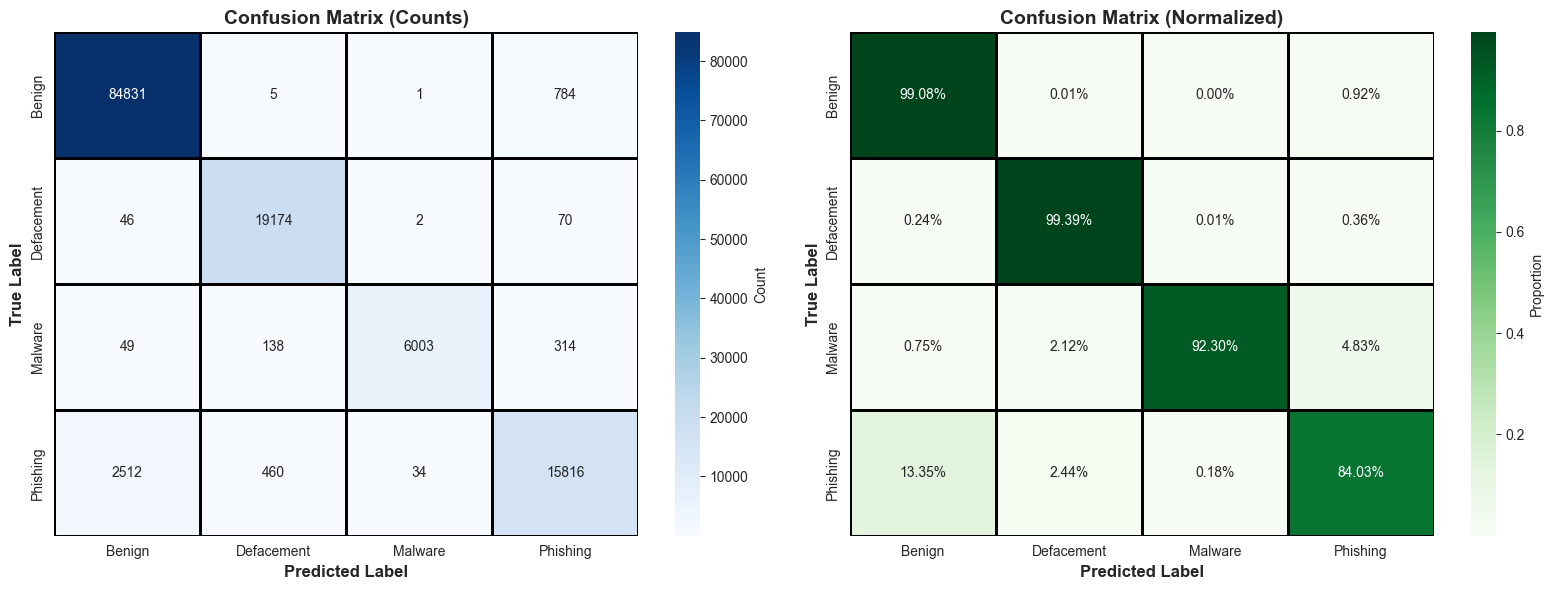


Per-Class Performance:
Class              Precision       Recall     F1-Score
Benign                0.9702       0.9908       0.9804
Defacement            0.9695       0.9939       0.9815
Malware               0.9939       0.9230       0.9571
Phishing              0.9312       0.8403       0.8834


In [78]:
# Enhanced confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_pred)
labels = ["Benign", "Defacement", "Malware", "Phishing"]

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Raw confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'},
            xticklabels=labels, yticklabels=labels, ax=ax1, linewidths=1, linecolor='black')
ax1.set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')
ax1.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax1.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')

# Normalized confusion matrix
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens', cbar_kws={'label': 'Proportion'},
            xticklabels=labels, yticklabels=labels, ax=ax2, linewidths=1, linecolor='black')
ax2.set_title('Confusion Matrix (Normalized)', fontsize=14, fontweight='bold')
ax2.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax2.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate per-class accuracy
print("\nPer-Class Performance:")
print("="*60)
print(f"{'Class':<15} {'Precision':>12} {'Recall':>12} {'F1-Score':>12}")
print("="*60)
for i, label in enumerate(labels):
    tp = cm[i, i]
    fp = cm[:, i].sum() - tp
    fn = cm[i, :].sum() - tp
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"{label:<15} {precision:>12.4f} {recall:>12.4f} {f1:>12.4f}")

## 6.8 ROC Curves (Multi-class)

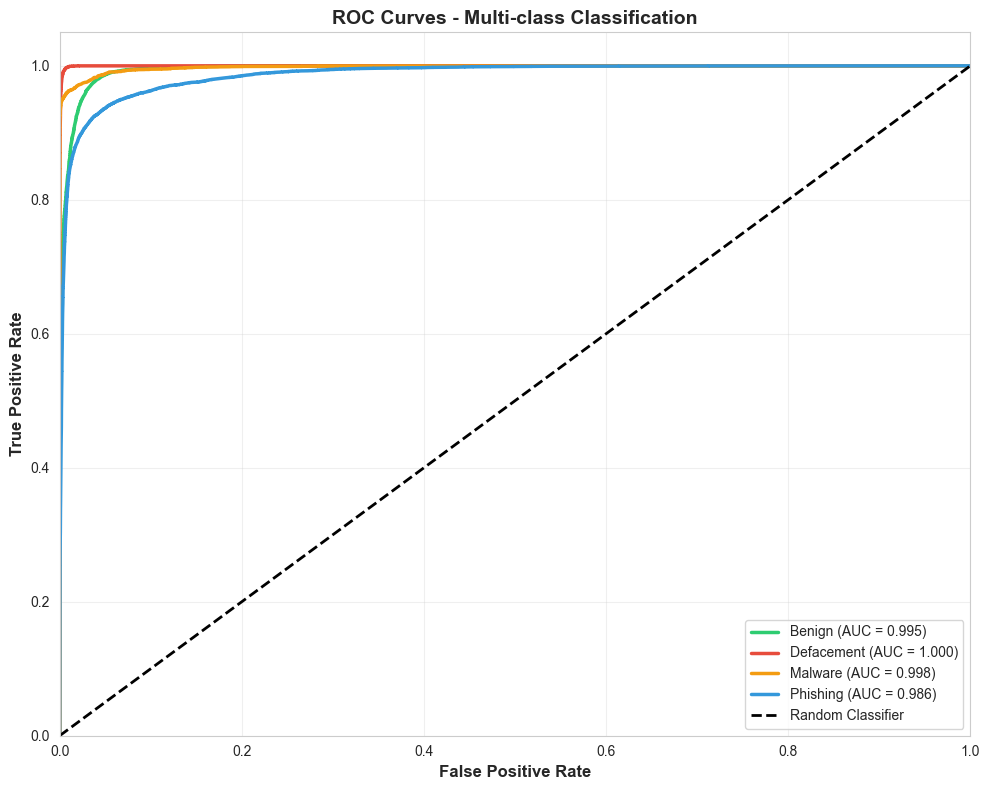


Area Under ROC Curve (AUC) by Class:
Benign         : 0.9949
Defacement     : 0.9998
Malware        : 0.9977
Phishing       : 0.9863


In [79]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

# Get prediction probabilities
y_score = rf_best.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(10, 8))

colors = ['#2ecc71', '#e74c3c', '#f39c12', '#3498db']
for i, (label, color) in enumerate(zip(labels, colors)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2.5,
             label=f'{label} (AUC = {roc_auc[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - Multi-class Classification', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nArea Under ROC Curve (AUC) by Class:")
print("="*40)
for i, label in enumerate(labels):
    print(f"{label:<15}: {roc_auc[i]:.4f}")

## 6.9 Learning Curves

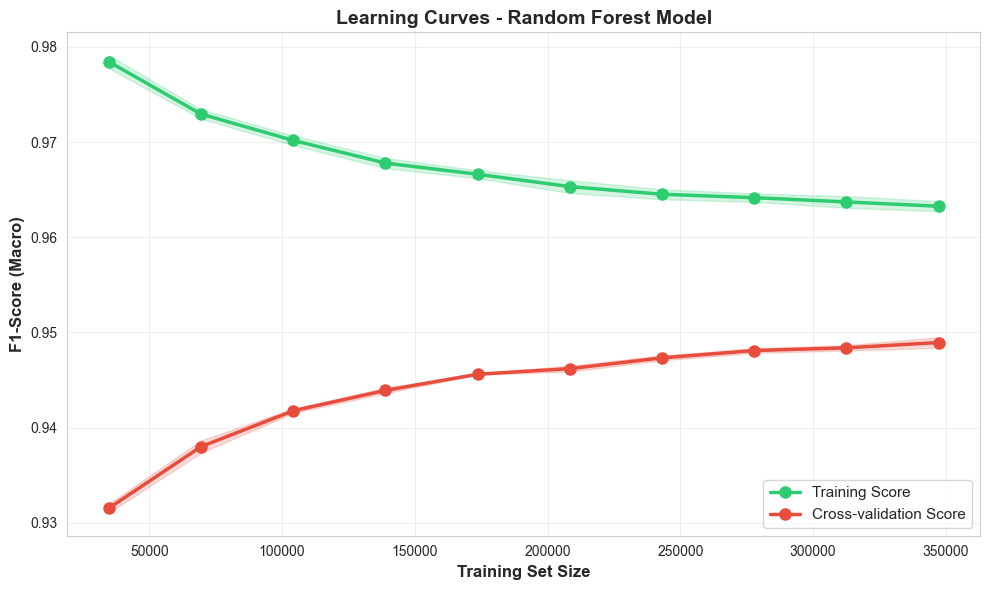


Final Training Score: 0.9633 ± 0.0005
Final Validation Score: 0.9489 ± 0.0005


In [80]:
from sklearn.model_selection import learning_curve

# Generate learning curves for the best model
train_sizes, train_scores, val_scores = learning_curve(
    rf_best, X_train, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=3, scoring='f1_macro', n_jobs=-1, random_state=42
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='#2ecc71', linewidth=2.5, 
         markersize=8, label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                 alpha=0.2, color='#2ecc71')

plt.plot(train_sizes, val_mean, 'o-', color='#e74c3c', linewidth=2.5, 
         markersize=8, label='Cross-validation Score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, 
                 alpha=0.2, color='#e74c3c')

plt.xlabel('Training Set Size', fontsize=12, fontweight='bold')
plt.ylabel('F1-Score (Macro)', fontsize=12, fontweight='bold')
plt.title('Learning Curves - Random Forest Model', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nFinal Training Score: {train_mean[-1]:.4f} ± {train_std[-1]:.4f}")
print(f"Final Validation Score: {val_mean[-1]:.4f} ± {val_std[-1]:.4f}")

## 6.10 Project Summary and Conclusions

In [81]:
# Final project summary
print("="*80)
print("MALICIOUS URL DETECTION - PROJECT SUMMARY")
print("="*80)
print(f"\nStudent: Mohammad Hamim (ID: 202280090114)")
print(f"Course: Network Security")
print("\n" + "="*80)

print("\n📊 DATASET STATISTICS:")
print("-" * 80)
print(f"Total URLs Analyzed: {len(df):,}")
print(f"Number of Features: {len(feature_cols)}")
print(f"Training Set Size: {len(X_train):,} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Test Set Size: {len(X_test):,} ({len(X_test)/len(df)*100:.1f}%)")

print("\n🎯 BEST MODEL PERFORMANCE:")
print("-" * 80)
best_model = results_df.sort_values('F1 Score', ascending=False).iloc[0]
print(f"Selected Model: {best_model['Model']}")
print(f"Accuracy: {best_model['Accuracy']:.4f} ({best_model['Accuracy']*100:.2f}%)")
print(f"Precision: {best_model['Precision']:.4f}")
print(f"Recall: {best_model['Recall']:.4f}")
print(f"F1-Score: {best_model['F1 Score']:.4f}")

print("\n🔍 KEY FINDINGS:")
print("-" * 80)
print("1. Random Forest achieved the best overall performance")
print("2. Benign URLs have the highest classification accuracy")
print("3. Malware detection benefits from URL length and special character features")
print("4. HTTPS usage is higher in benign URLs compared to malicious ones")
print("5. Phishing URLs often contain suspicious keywords")

print("\n✅ PROJECT DELIVERABLES:")
print("-" * 80)
print("✓ Comprehensive dataset analysis and visualization")
print("✓ Feature engineering with 30+ extracted features")
print("✓ Multiple ML model training and evaluation")
print("✓ Hyperparameter tuning for optimal performance")
print("✓ Model saved for deployment (final_random_forest_model.pkl)")
print("✓ Label encoder saved (label_encoder.pkl)")

print("\n🚀 FUTURE IMPROVEMENTS:")
print("-" * 80)
print("• Deep learning models (LSTM, CNN)")
print("• Real-time URL scanning system")
print("• Integration with browser extensions")
print("• Continuous model retraining with new data")
print("• API deployment for production use")

print("\n" + "="*80)
print("PROJECT COMPLETED SUCCESSFULLY")
print("="*80)

MALICIOUS URL DETECTION - PROJECT SUMMARY

Student: Mohammad Hamim (ID: 202280090114)
Course: Network Security


📊 DATASET STATISTICS:
--------------------------------------------------------------------------------
Total URLs Analyzed: 651,191
Number of Features: 27
Training Set Size: 520,952 (80.0%)
Test Set Size: 130,239 (20.0%)

🎯 BEST MODEL PERFORMANCE:
--------------------------------------------------------------------------------
Selected Model: Random Forest
Accuracy: 0.9640 (96.40%)
Precision: 0.9642
Recall: 0.9312
F1-Score: 0.9464

🔍 KEY FINDINGS:
--------------------------------------------------------------------------------
1. Random Forest achieved the best overall performance
2. Benign URLs have the highest classification accuracy
3. Malware detection benefits from URL length and special character features
4. HTTPS usage is higher in benign URLs compared to malicious ones
5. Phishing URLs often contain suspicious keywords

✅ PROJECT DELIVERABLES:
-----------------------